<a href="https://www.kaggle.com/code/adharshinikumar/winning-probability-of-sih?scriptVersionId=254984748" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sih-2024-ps-with-winning-teams-and-solutions/SIH_PS_Winners_2024.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/sih-2024-ps-with-winning-teams-and-solutions/SIH_PS_Winners_2024.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.upper()

In [3]:
summary = {
    "Total Entries": len(df),
    "Unique Problem Statements": df["ID"].nunique(),
    "Number of Categories": df["CATEGORY"].nunique(),
    "Number of Technology Domains": df["TECHNOLOGY_BUCKET"].nunique(),
    "Unique Institutes": df["INSTITUTE"].nunique(),
    "Unique Cities": df["INSTITUTE_CITY"].nunique(),
    "Unique States": df["INSTITUTE_STATE"].nunique()
}

pd.DataFrame(summary.items(), columns=["Metric", "Value"])

,Metric,Value
0,Total Entries,324
1,Unique Problem Statements,246
2,Number of Categories,3
3,Number of Technology Domains,18
4,Unique Institutes,217
5,Unique Cities,99
6,Unique States,34


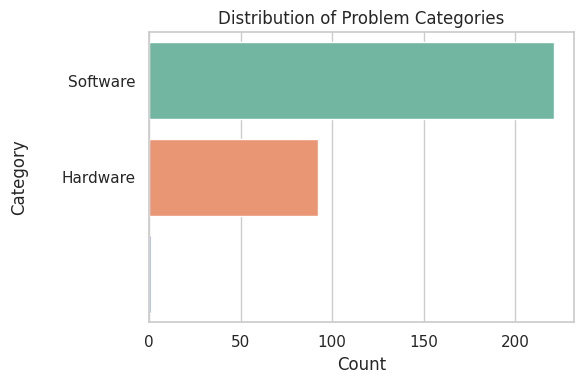

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y="CATEGORY", order=df["CATEGORY"].value_counts().index, palette="Set2")
plt.title("Distribution of Problem Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

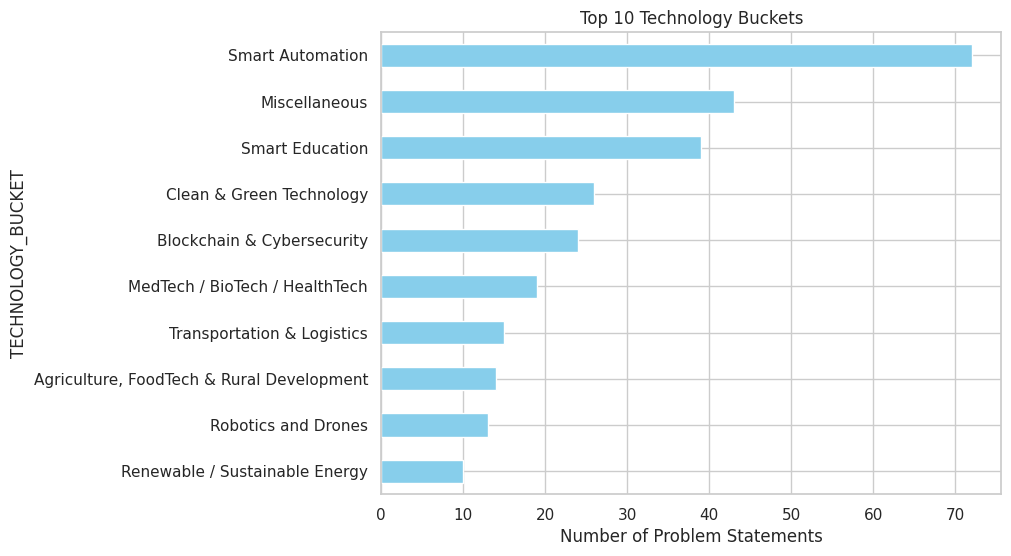

In [5]:
tech_domains = df["TECHNOLOGY_BUCKET"].value_counts().head(10)
tech_domains.plot(kind="barh", color="skyblue", figsize=(8,6), title="Top 10 Technology Buckets")
plt.gca().invert_yaxis()
plt.xlabel("Number of Problem Statements")
plt.show()

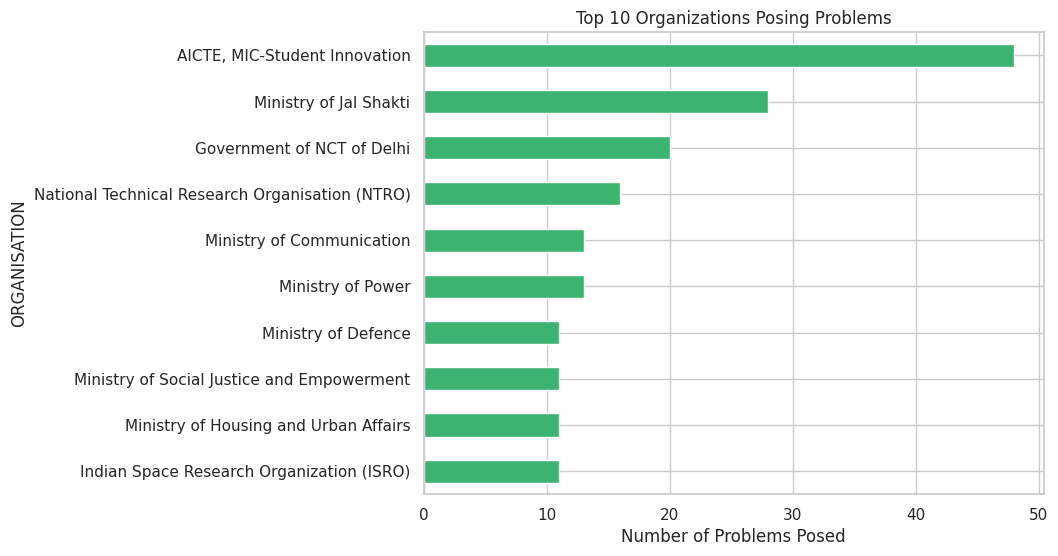

In [6]:
top_orgs = df["ORGANISATION"].value_counts().head(10)
top_orgs.plot(kind="barh", color="mediumseagreen", figsize=(8,6), title="Top 10 Organizations Posing Problems")
plt.gca().invert_yaxis()
plt.xlabel("Number of Problems Posed")
plt.show()

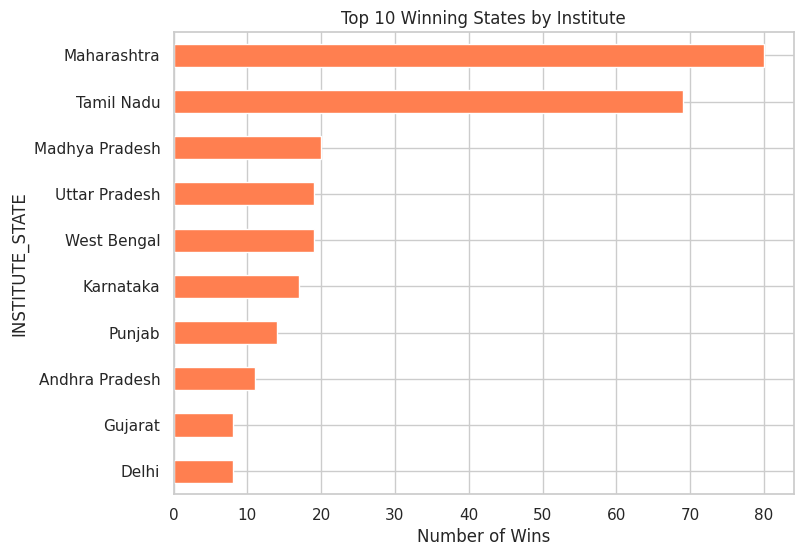

In [7]:
top_states = df["INSTITUTE_STATE"].value_counts().head(10)
top_states.plot(kind="barh", color="coral", figsize=(8,6), title="Top 10 Winning States by Institute")
plt.gca().invert_yaxis()
plt.xlabel("Number of Wins")
plt.show()

# Conclusion
This dataset provides a clear overview of real-world challenges posed by various Indian ministries and how student teams from across the country responded with winning solutions.

The insights can guide future participants of SIH to: 
- Choose problem domains with higher win rates
- Understand focus areas of different ministries
- Identify regional strengths in innovation